In [3]:
from openpyxl import Workbook
from openpyxl import load_workbook

In [24]:
#load spreadsheet
work_book = load_workbook('/Users/callumjones/Desktop/trial-file.xlsx')   #insert excel file data here
#create an active worksheet
work_sheet = work_book.active
#print something from worksheet
print(f'{work_sheet['C4'].value} with the cost of £{work_sheet['E4'].value}')  #test row 

#whole column test 
column_b = work_sheet['C4':'C16']

for col in column_b:   #whole test 
    for row in col:
        print(row.value)

Food with the cost of £50
Food
Transport
Entertainment
Transport
Subscription
Transport
Entertainment
Utilities
Food
Entertainment
Subscription
Transport
Food


In [11]:
# function to find all recurring / non-recurring spend in the data set 
def find_all_recurring(excel_data, column, value_check):
    matching_rows=[]
    for row in excel_data.iter_rows(min_row=1, max_row=100, values_only=True):
        col_index = ord(column.upper()) - ord('A')   #amend order() depending on header 
        if row[col_index] == value_check:
            clean_data = tuple(cell for cell in row if cell is not None)
            matching_rows.append(clean_data)
    return matching_rows


# returning list of tuples to check if value in G (recurring in the excel file) is either yes or no 
recurring_row_payments = list(find_all_recurring(work_sheet, 'G', 'Yes'))
non_recurring_payments = list(find_all_recurring(work_sheet, 'G', 'No'))

#takes arguments to sum of all ints in each variable above 
def total_cost(data):
    total_cost = 0
    for row in data:
        if isinstance(row[3],(int,float)):
            total_cost += row[3]
    return(total_cost) 

total_recurring = total_cost(recurring_row_payments)
total_non_recurring = total_cost(non_recurring_payments)
total_spend = total_recurring+total_non_recurring

print(f'Recurring payments total was: £{total_recurring}')
print(f'Non recurring payments total was: £{total_non_recurring}')
print(f'Total spend was: £{total_spend}')
print(f'Recurring spend as a percentage of total spend was: {round((total_recurring/total_spend) * 100, 2)}%')
print(f'Non recurring spend as a percentage of total spend was: {round((total_non_recurring/total_spend) * 100, 2)}%')


Recurring payments total was: £264
Non recurring payments total was: £1032.95
Total spend was: £1296.95
Recurring spend as a percentage of total spend was: 20.36%
Non recurring spend as a percentage of total spend was: 79.64%


In [13]:
import pandas as pd

df = pd.read_excel('/Users/callumjones/Desktop/trial-file.xlsx', engine='openpyxl') 

In [15]:
new_df = pd.DataFrame(df)
del new_df['Unnamed: 0']
del new_df['Unnamed: 7'] 
new_df = new_df.iloc[2:]


In [17]:
new_df.rename(columns={'Unnamed: 1': 'Date', 'Unnamed: 2': 'Category', 'Unnamed: 3': 'Description', 'Unnamed: 4': 'Cost (in £s)', 'Unnamed: 5': 'Payment Method', 'Unnamed: 6': 'Recurring'}, inplace=True)

In [19]:
payment_methods = new_df['Payment Method']

def counting_items(x):

    counting_dict = {}
    
    for row in x:
        if row not in counting_dict:
            counting_dict[row] = 1
        else:
            counting_dict[row] += 1

    return counting_dict

counting_items(payment_methods)

{'Debit Card': 12, 'Credit Card': 17, 'Cash': 8, 'Bank Transfer': 7}

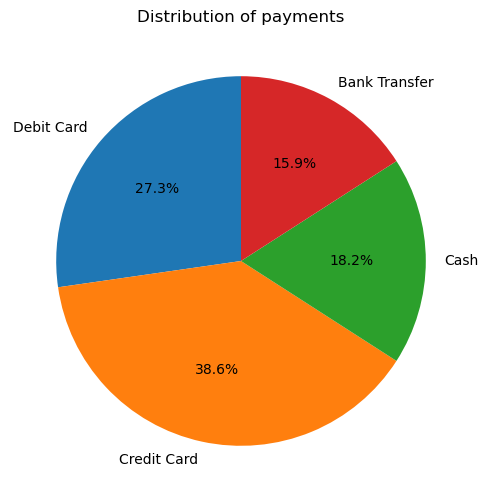

In [21]:
import matplotlib.pyplot as plt

payment_data = counting_items(payment_methods)

labels = payment_data.keys()
frequency = payment_data.values()

plt.figure(figsize=(6,6))
plt.pie(frequency, labels=labels, autopct='%1.1f%%', startangle=90) 

plt.title('Distribution of payments')

plt.show()